# Installing imgaug Library and its Dependancies

In [0]:
!pip install --upgrade six numpy scipy Pillow matplotlib scikit-image opencv-python imageio Shapely pandas
!pip install imgaug
import time
from IPython.display import clear_output

clear_output()
 

time.sleep(1)
import os
os.kill(os.getpid(), 9)

# Downloading Dataset

In [0]:
!wget  -P /content/ "http://cs231n.stanford.edu/tiny-imagenet-200.zip"

!unzip -qq tiny-imagenet-200.zip 
!rm tiny-imagenet-200.zip


--2019-04-02 05:52:52--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘/content/tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  10.5MB/s    in 32s     

2019-04-02 05:53:24 (7.40 MB/s) - ‘/content/tiny-imagenet-200.zip’ saved [248100043/248100043]

replace tiny-imagenet-200/words.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
train_location = '/content/tiny-imagenet-200/train/'
test_location  = '/content/tiny-imagenet-200/test/'
valid_location = '/content/tiny-imagenet-200/val/'

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mplib
import numpy as np
from imutils import paths
import os
import cv2
from random import shuffle

import keras
from imgaug import augmenters as iaa

from random import randint

from tensorflow.keras.callbacks import Callback
import tensorflow as tf
import tensorflow.keras.backend as K

# Hyperparameters
batch_size = 128

num_classes = len(next(os.walk(train_location))[1])
epochs = 200


Using TensorFlow backend.


# Loading Dataset into x_train, y_train, x_valid, y_valid

In [0]:
def load_data():

    f = open("tiny-imagenet-200/wnids.txt", "r")
    labels = []
    for line in f:
      labels.append(line.split()[0])

    print('Loading Train images')
    train_path = list(paths.list_images(train_location))
    y_train = []
    shuffle(train_path)

    for img in train_path:
      img_id=img.split('/')[-3]
      if img_id in labels:
        y_train.append(labels.index(img_id))


    x_train = [cv2.imread(file) for file in train_path]
    x_train = np.array(x_train)

    #Generating validation data
    
    print('Loading Validation images')
    val_f = open("tiny-imagenet-200/val/val_annotations.txt", "r")
    y_valid = []
    x_valid = []
    for line in val_f:
      data = line.split()
      x_valid.append(cv2.imread(valid_location+'images/'+data[0]))
      y_valid.append(line.split()[1])


    for index,value in enumerate(y_valid):
      y_valid[index] = labels.index(value)

    x_valid = np.array(x_valid)
    
    #Generating one hot encoded outputs
    
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_valid = keras.utils.to_categorical(y_valid, num_classes)
    
    return x_train,y_train,x_valid,y_valid


In [0]:
x_train, y_train, x_valid, y_valid = load_data()

Loading Train images
Loading Validation images


In [0]:
def space_to_depth_x4(x):
    return tf.space_to_depth(x, block_size=4)
def space_to_depth_x2(x):
    return tf.space_to_depth(x, block_size=2)

# Model Definition

In [0]:
model = tf.keras.models.Model()

img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]


input = tf.keras.layers.Input(shape=(img_height, img_width, channel,),name = 'input')



# Block 1

# Layer 1
layer1 = tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input)
layer1 = tf.keras.layers.BatchNormalization(name='norm_1')(layer1)
layer1 = tf.keras.layers.ReLU(name='relu_1')(layer1)


# Layer 2
layer2 = tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_2', use_bias=False)(layer1)
layer2 = tf.keras.layers.BatchNormalization(name='norm_2')(layer2)
layer2 = tf.keras.layers.ReLU(name='relu_2')(layer2)


# Layer 3
layer3 = tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_3', use_bias=False)(layer2)
layer3 = tf.keras.layers.BatchNormalization(name='norm_3')(layer3)
layer3 = tf.keras.layers.ReLU(name='relu_3')(layer3)

# Layer 4
layer4 = tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_4', use_bias=False)(layer3)
layer4 = tf.keras.layers.BatchNormalization(name='norm_4')(layer4)
layer4 = tf.keras.layers.ReLU(name='relu_4')(layer4)

# Layer 5

layer5 = tf.keras.layers.Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_5', use_bias=False)(layer4)
layer5 = tf.keras.layers.BatchNormalization(name='norm_5')(layer5)
layer5 = tf.keras.layers.ReLU(name='relu_5')(layer5)

layer5 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),name='maxp_1')(layer5)



# Block 2

# Layer 6
layer6 = tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_6', use_bias=False)(layer5)
layer6 = tf.keras.layers.BatchNormalization(name='norm_6')(layer6)
layer6 = tf.keras.layers.ReLU(name='relu_6')(layer6)


# Layer 7
layer7 = tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_7', use_bias=False)(layer6)
layer7 = tf.keras.layers.BatchNormalization(name='norm_7')(layer7)
layer7 = tf.keras.layers.ReLU(name='relu_7')(layer7)


# Layer 8
layer8 = tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_8', use_bias=False)(layer7)
layer8 = tf.keras.layers.BatchNormalization(name='norm_8')(layer8)
layer8 = tf.keras.layers.ReLU(name='relu_8')(layer8)

layer9 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),name='maxp_2')(layer8)

skip_connection_1 = layer9

# Block 3

# Layer 10
layer10 = tf.keras.layers.Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_10', use_bias=False)(layer9)
layer10 = tf.keras.layers.BatchNormalization(name='norm_10')(layer10)
layer10 = tf.keras.layers.ReLU(name='relu_10')(layer10)


# Layer 11
layer11 = tf.keras.layers.Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_11', use_bias=False)(layer10)
layer11 = tf.keras.layers.BatchNormalization(name='norm_11')(layer11)
layer11 = tf.keras.layers.ReLU(name='relu_11')(layer11)


# Layer 12
layer12 = tf.keras.layers.Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_12', use_bias=False)(layer11)
layer12 = tf.keras.layers.BatchNormalization(name='norm_12')(layer12)
layer12 = tf.keras.layers.ReLU(name='relu_12')(layer12)


layer13 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),name='maxp_3')(layer12)

skip_connection_2 = layer13

# Block 4

# Layer 14
layer14 = tf.keras.layers.Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_14', use_bias=False)(layer13)
layer14 = tf.keras.layers.BatchNormalization(name='norm_14')(layer14)
layer14 = tf.keras.layers.ReLU(name='relu_14')(layer14)


# Layer 15
layer15 = tf.keras.layers.Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_15', use_bias=False)(layer14)
layer15 = tf.keras.layers.BatchNormalization(name='norm_15')(layer15)
layer15 = tf.keras.layers.ReLU(name='relu_15')(layer15)

# Layer 16
layer16 = tf.keras.layers.Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_16', use_bias=False)(layer15)
layer16 = tf.keras.layers.BatchNormalization(name='norm_16')(layer16)
layer16 = tf.keras.layers.ReLU(name='relu_16')(layer16)

layer17 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),name='maxp_4')(layer16)


# Block 5

skip_connection_1 = tf.keras.layers.Lambda(space_to_depth_x4,name='Skip_1')(skip_connection_1)
skip_connection_2 = tf.keras.layers.Lambda(space_to_depth_x2,name='Skip_2')(skip_connection_2)

layer18 = tf.keras.layers.concatenate([skip_connection_1,skip_connection_2, layer17],name='Concatenate')

layer19 = tf.keras.layers.Conv2D(num_classes, (1,1), strides=(1,1), name='conv_21', use_bias=False)(layer18) 

layer20 = tf.keras.layers.GlobalAveragePooling2D(name='GAP')(layer19)



layer21 = tf.keras.layers.Flatten(name='Flatten')(layer20)

output = tf.keras.layers.Activation('softmax',name='Activation')(layer21)



In [0]:
model = tf.keras.models.Model(inputs=[input], outputs=[output])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 64, 64, 128)  3456        input[0][0]                      
__________________________________________________________________________________________________
norm_1 (BatchNormalizationV1)   (None, 64, 64, 128)  512         conv_1[0][0]                     
__________________________________________________________________________________________________
relu_1 (ReLU)                   (None, 64, 64, 128)  0           norm_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Co

In [0]:
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
     model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)
tpu_model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Querying Tensorflow master (grpc://10.113.150.58:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 10790406948274589873)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 10858394625500924638)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 14346784956337743808)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TP

# FineTuning Using Callbacks

In [0]:
class FineTuner(tf.keras.callbacks.Callback):
  
    def __init__(self,starting_lr = 1e-4):
        super(tf.keras.callbacks.Callback, self).__init__()
        self.lr = starting_lr
        self.best_score = -1
        self.wait = 0
        self.freeze = 0
        self.current_score = -1
        
    def on_train_begin(self, logs={}):
      self.aucs = []
      self.losses = []
      K.set_value(self.model.optimizer.lr,self.lr)
      
      
    def on_epoch_end(self,epoch,logs = {}):
      for layer in model.layers:
          layer.trainable = True
          
      self.current_score = logs.get('val_acc')
      if self.current_score > 0.40:
        if self.wait == 4 :
          self.lr = self.lr - 1e-5

        
      K.set_value(self.model.optimizer.lr,self.lr)
      
      print('Learning Rate : ',K.get_value(self.model.optimizer.lr))
      
      
      if self.current_score > 0.50:
        if self.freeze < 5:
          print('Frozen Block 1')
          for layer in model.layers[:11]:
            layer.trainable = False
        if self.freeze < 10 and self.freeze >= 5:
          print('Frozen Block 2')
          for layer in model.layers[11:21]:
            layer.trainable = False
        if self.freeze < 15 and self.freeze >= 10:
          print('Frozen Block 3')
          for layer in model.layers[21:31]:
            layer.trainable = False
        if self.freeze < 20 and self.freeze >= 15:
          print('Frozen Block 4')
          for layer in model.layers[31:]:
            layer.trainable = False
        if self.freeze < 25 and self.freeze >= 20:
          print('Unfrozen Training')
        self.freeze = (self.freeze + 1) % 25
        
      if self.current_score < self.best_score:
        self.wait = self.wait + 1
        print('warning',self.wait)
        if self.wait > 10:
          print("Epoch %d: early stopping" % (epoch))
          self.model.stop_training = True
      else:
        self.best_score = self.current_score
        self.wait = 0
        if self.current_score > 0.50:
          self.model.save_weights("model_weights_{:.2%}.h5".format(self.current_score))
          
  
FT = FineTuner()

# Augmentation

In [0]:
def augmentations(images,class_id):
  augimgs = []
  labels = []
  for i,image in enumerate(images):
    channel_no = randint(0,2)
    channel = image[:,:,channel_no]
    augimgs.append(image)
    flipper = iaa.Fliplr(1)
    augimgs.append(flipper.augment_image(image))
    blurer = iaa.GaussianBlur(1.5)
    augimgs.append(blurer.augment_image(image))
    sap = iaa.SaltAndPepper(0.5,False)
    augimgs.append(sap.augment_image(image))
    gamma = iaa.GammaContrast(2)
    augimgs.append(gamma.augment_image(image))
    invert = iaa.Invert(1, True)
    augimgs.append(invert.augment_image(image))
    flipud = iaa.Flipud(1)
    augimgs.append(flipud.augment_image(image))
    grayscale = np.array([channel,channel,channel])
    grayscale = np.transpose(grayscale,(1,2,0))
    augimgs.append(grayscale)
    labels.extend(class_id[i] for k in range(8))
  augimgs = np.array(augimgs)
  labels = np.array(labels)
  return augimgs,labels

# Training

In [0]:
def train_gen(batch_size):
  while True:
    offset = np.random.randint(0,(x_train.shape[0]-batch_size))
    yield auger(x_train[offset:offset+batch_size],y_train[offset:offset+batch_size])

tpu_model.fit_generator(
    train_gen(batch_size),
    epochs=epochs,
    steps_per_epoch=200,
    validation_data=(x_valid, y_valid),
    callbacks = [FT]
)

Epoch 1/200
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(128,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(128, 64, 64, 3), dtype=tf.float32, name='input_1_10'), TensorSpec(shape=(128, 200), dtype=tf.float32, name='activation_target_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Cloning Adam {'lr': 9.999999747378752e-05, 'beta_1': 0.8999999761581421, 'beta_2': 0.9990000128746033, 'decay': 0.0, 'epsilon': 1e-07, 'amsgrad': False}
INFO:tensorflow:Remapping placeholder for input_1
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:KerasCrossShard: <tensorflow.python.keras.optimizers.Adam object at 0x7fb018f8c518> []
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 17.56500768661499 secs
INFO:tensorflow:Setting weights on TPU model.
INFO:tensorflow:CPU -> TPU lr: 9.999999747378752e-05 {1e-04}
INFO:tensorflow:CPU -

# Augmented Images Sample

In [0]:
x_train1,labels = augmentations(x_train[1:6],y_train[1:6])

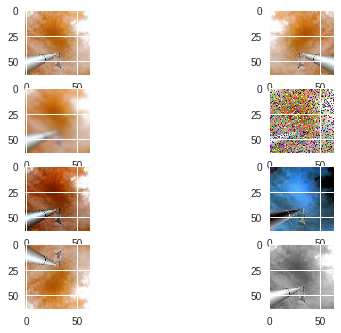

In [0]:
fig=plt.figure()
for i in range(1,9):
    fig.add_subplot(4, 2, i)
    plt.imshow(x_train1[i-1])
plt.show()

# Evaluate on Validation

In [0]:
import glob
weights =  glob.glob("*.h5")
weights.sort()
best_weight = weights[-1]

In [0]:
model.load_weights(best_weight)
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [0]:
score = model.evaluate(x_valid,y_valid)
print(score)

10000/10000 [==============================] - 53s 5ms/sample - loss: 1.8930 - acc: 0.5526
[1.8929671215057373, 0.5526]
